In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")

In [21]:
seoul_bjd = gpd.GeoDataFrame.from_file('EMD_202101/TL_SCCO_EMD.shp', encoding='cp949')
seoul_bjd.crs = epsg5179
seoul_sig = gpd.GeoDataFrame.from_file('SIG_202101/TL_SCCO_SIG.shp', encoding='cp949')
seoul_sig.crs = epsg5179

In [4]:
pt_119 = pd.read_csv('./서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv', encoding='cp949', dtype=str)
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry='geometry', crs = epsg4326)
pt_119 = pt_119.to_crs(epsg5179)

In [6]:
seoul_sig

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((1007462.095 2008948.792, 1007512.150..."
1,42130,Wonju-si,원주시,"POLYGON ((1038519.196 1944888.174, 1038552.691..."
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((1136545.803 1962251.161, 11365..."
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((1140184.975 1956251.627, 11401..."
4,42190,Taebaek-si,태백시,"POLYGON ((1133987.168 1927444.971, 1133980.895..."
...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((1003329.529 1867824.774, 1003386.941..."
246,43750,Jincheon-gun,진천군,"POLYGON ((994785.370 1890378.710, 994834.270 1..."
247,43760,Goesan-gun,괴산군,"POLYGON ((1026770.639 1883281.549, 1026781.261..."
248,43770,Eumseong-gun,음성군,"POLYGON ((1011533.109 1906176.344, 1011531.998..."


In [26]:
seoul_bjd

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,42110101,Bongui-dong,봉의동,"POLYGON ((1020498.164 1987458.238, 1020486.907..."
1,42110102,Yoseon-dong,요선동,"POLYGON ((1019860.036 1986977.936, 1019862.394..."
2,42110103,Nagwon-dong,낙원동,"POLYGON ((1019635.000 1986381.326, 1019566.366..."
3,42110104,Jungangno 1(il)-ga,중앙로1가,"POLYGON ((1020217.642 1987072.283, 1020190.311..."
4,42110105,Jungangno 2(i)-ga,중앙로2가,"POLYGON ((1019733.606 1986437.275, 1019725.206..."
...,...,...,...,...
5046,43800320,Gagok-myeon,가곡면,"POLYGON ((1085187.043 1897388.641, 1085389.253..."
5047,43800330,Yeongchun-myeon,영춘면,"POLYGON ((1078501.311 1906948.423, 1078509.578..."
5048,43800340,Eosangcheon-myeon,어상천면,"POLYGON ((1074485.607 1906892.467, 1074493.324..."
5049,43800350,Jeokseong-myeon,적성면,"POLYGON ((1066794.136 1896994.391, 1066831.933..."


In [9]:
result = gpd.sjoin(seoul_sig, pt_119, how='left', op="intersects")
result.index_right.unique()

array([ nan,  75.,  98.,   6.,   5.,   8.,   7.,  27.,  99.,  12.,  13.,
         9.,  11.,  10.,  95.,   3.,  14.,  15.,   4.,  77., 112.,  80.,
        16., 100., 111.,  78.,  96.,  19.,  50.,  22.,  18.,  67.,  62.,
        63.,   1.,  23.,  37.,  38.,  65.,  73.,  89.,  84.,  70.,  49.,
        46.,  91.,  90.,  79.,  72.,  81., 115., 103.,  92.,  52., 110.,
        57.,  56.,  55.,  33.,  83.,  31.,  32.,  82.,  43.,  24.,  47.,
         0.,  66.,  74., 101.,  44., 102.,  34.,  36.,  21.,  20., 116.,
        54.,  53.,  94.,  26.,  93., 104.,  30., 105.,  40., 106.,  39.,
        68.,  29.,  97.,  25.,  69.,  60.,  61.,  35.,  85.,  76.,   2.,
        45.,  48.,  64.,  59.,  42., 113., 114.,  28.,  58.,  87.,  41.,
        51.,  86.,  71., 108.,  88., 109., 107.,  17.])

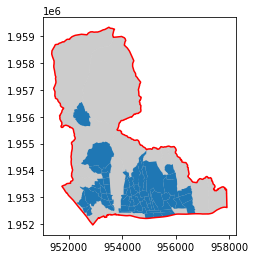

In [12]:
result1 = gpd.sjoin(seoul_sig, seoul_bjd, how='left', op='contains')
bjd_list = result1[result1["SIG_KOR_NM"]=="종로구"]["EMD_CD"].tolist()

ax = seoul_sig[seoul_sig["SIG_CD"]=="11110"].boundary.plot(color='red')
seoul_bjd[seoul_bjd["EMD_CD"].str.startswith("11110")].plot(ax=ax,color='black', alpha=0.2)
seoul_bjd[seoul_bjd["EMD_CD"].isin(bjd_list)].plot(ax=ax)
plt.show()

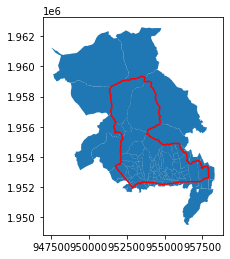

In [27]:
result2 = gpd.sjoin(seoul_sig, seoul_bjd, how='left', op='intersects')
bjd_list = result2[result2["SIG_KOR_NM"]=="종로구"]["EMD_CD"].tolist()

ax = seoul_sig[seoul_sig["SIG_CD"]=="11110"].boundary.plot(color='red')
seoul_bjd[seoul_bjd["EMD_CD"].str.startswith("11110")].plot(ax=ax,color='black', alpha=0.2)
seoul_bjd[seoul_bjd["EMD_CD"].isin(bjd_list)].plot(ax=ax)
plt.show()

In [19]:
seoul_sig["geometry"].buffer(1)

0      POLYGON ((1006625.208 1995919.538, 1006596.983...
1      POLYGON ((1021990.729 1914870.513, 1021960.580...
2      MULTIPOLYGON (((1096861.107 1976087.980, 10968...
3      MULTIPOLYGON (((1146830.747 1943429.597, 11468...
4      POLYGON ((1123159.482 1901347.362, 1123125.431...
                             ...                        
245    POLYGON ((1003325.080 1867820.749, 1003325.048...
246    POLYGON ((981275.123 1877310.532, 981273.562 1...
247    POLYGON ((1010807.688 1865546.281, 1010808.164...
248    POLYGON ((995362.563 1883483.288, 995362.500 1...
249    POLYGON ((1063824.987 1895318.776, 1063824.975...
Length: 250, dtype: geometry

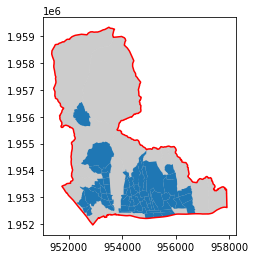

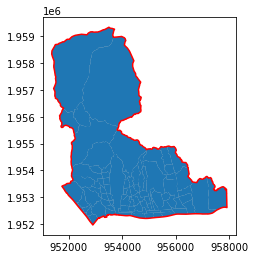

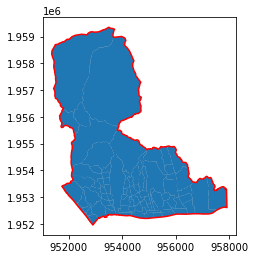

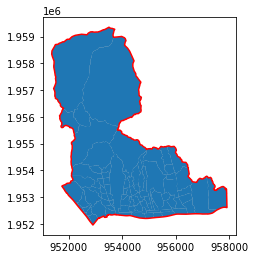

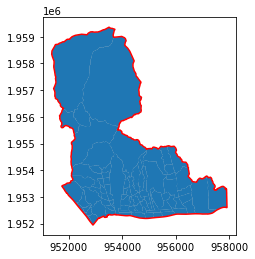

In [22]:
for i in range(5):
    seoul_sig["geometry"] = seoul_sig["geometry"].buffer(i)
    result2 = gpd.sjoin(seoul_sig, seoul_bjd, how='left', op='contains')
    bjd_list = result2[result2["SIG_KOR_NM"]=="종로구"]["EMD_CD"].tolist()

    ax = seoul_sig[seoul_sig["SIG_CD"]=="11110"].boundary.plot(color='red')
    seoul_bjd[seoul_bjd["EMD_CD"].str.startswith("11110")].plot(ax=ax,color='black', alpha=0.2)
    seoul_bjd[seoul_bjd["EMD_CD"].isin(bjd_list)].plot(ax=ax)
    plt.show()